# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

transaction_date  house_age  transit_distance  local_convenience_stores  \
0          2012.917       32.0          84.87882                        10   
1          2012.917       19.5         306.59470                         9   
2          2013.583       13.3         561.98450                         5   
3          2013.500       13.3         561.98450                         5   
4          2012.833        5.0         390.56840                         5   

   latitude  longitude  price_per_unit  
0  24.98298  121.54024            37.9  
1  24.98034  121.53951            42.2  
2  24.98746  121.54391            47.3  
3  24.98746  121.54391            54.8  
4  24.97937  121.54245            43.1

The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
# Your code to explore data and train a regression model
df_pre = data
df_pre.shape

(414, 7)

In [3]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [4]:
df_pre.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

In [5]:
df_pre.dtypes

transaction_date            float64
house_age                   float64
transit_distance            float64
local_convenience_stores      int64
latitude                    float64
longitude                   float64
price_per_unit              float64
dtype: object

In [6]:
df_pre.describe(include='all')

transaction_date   house_age  transit_distance  \
count        414.000000  414.000000        414.000000   
mean        2013.148971   17.712560       1083.885689   
std            0.281967   11.392485       1262.109595   
min         2012.667000    0.000000         23.382840   
25%         2012.917000    9.025000        289.324800   
50%         2013.167000   16.100000        492.231300   
75%         2013.417000   28.150000       1454.279000   
max         2013.583000   43.800000       6488.021000   

       local_convenience_stores    latitude   longitude  price_per_unit  
count                414.000000  414.000000  414.000000      414.000000  
mean                   4.094203   24.969030  121.533361       37.980193  
std                    2.945562    0.012410    0.015347       13.606488  
min                    0.000000   24.932070  121.473530        7.600000  
25%                    1.000000   24.963000  121.528085       27.700000  
50%                    4.000000   24.971100  121.538630       38.450000  
75%                    6.000000   24.977455  121.543305       46.600000  
max                   10.000000   25.014590  121.566270      117.500000

In [7]:
step1 = str(df_pre.transaction_date).strip()
print(step1)
step2 = step1.split('.')
print(step2)


0      2012.917
1      2012.917
2      2013.583
3      2013.500
4      2012.833
         ...   
409    2013.000
410    2012.667
411    2013.250
412    2013.000
413    2013.500
Name: transaction_date, Length: 414, dtype: float64
['0      2012', '917\n1      2012', '917\n2      2013', '583\n3      2013', '500\n4      2012', '833\n         ', '', '', '   \n409    2013', '000\n410    2012', '667\n411    2013', '250\n412    2013', '000\n413    2013', '500\nName: transaction_date, Length: 414, dtype: float64']


In [8]:
import numpy as np
import matplotlib.pyplot as plt
# This ensures plots are displayed inline in the Jupyter notebook
%matplotlib inline

label = df_pre.columns[-1]
print('label:', label)
features = df_pre.columns.values[:-1]
print('features:',features)

label: price_per_unit
features: ['transaction_date' 'house_age' 'transit_distance'
 'local_convenience_stores' 'latitude' 'longitude']


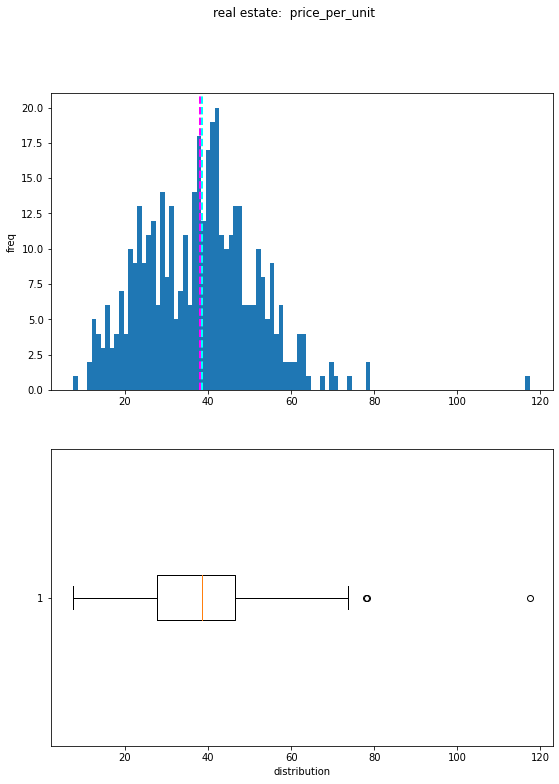

In [9]:
fig, ax = plt.subplots(nrows=2, figsize=(9,12))
ax[0].hist(df_pre[label], bins=100)
ax[0].set_ylabel('freq')
ax[0].axvline(df_pre[label].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(df_pre[label].median(), color='cyan', linestyle='dashed', linewidth=2)

ax[1].boxplot(df_pre[label], vert=False)
ax[1].set_xlabel('distribution')

fig.suptitle(' '.join(["real estate: ", label]))
fig.show()

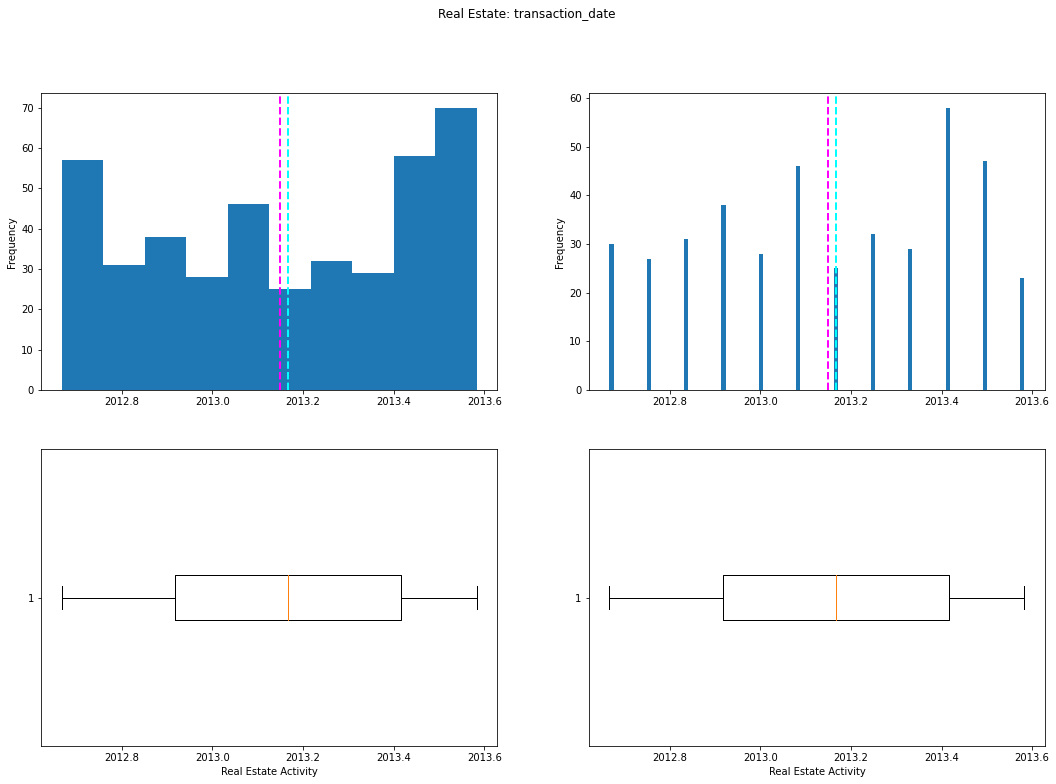

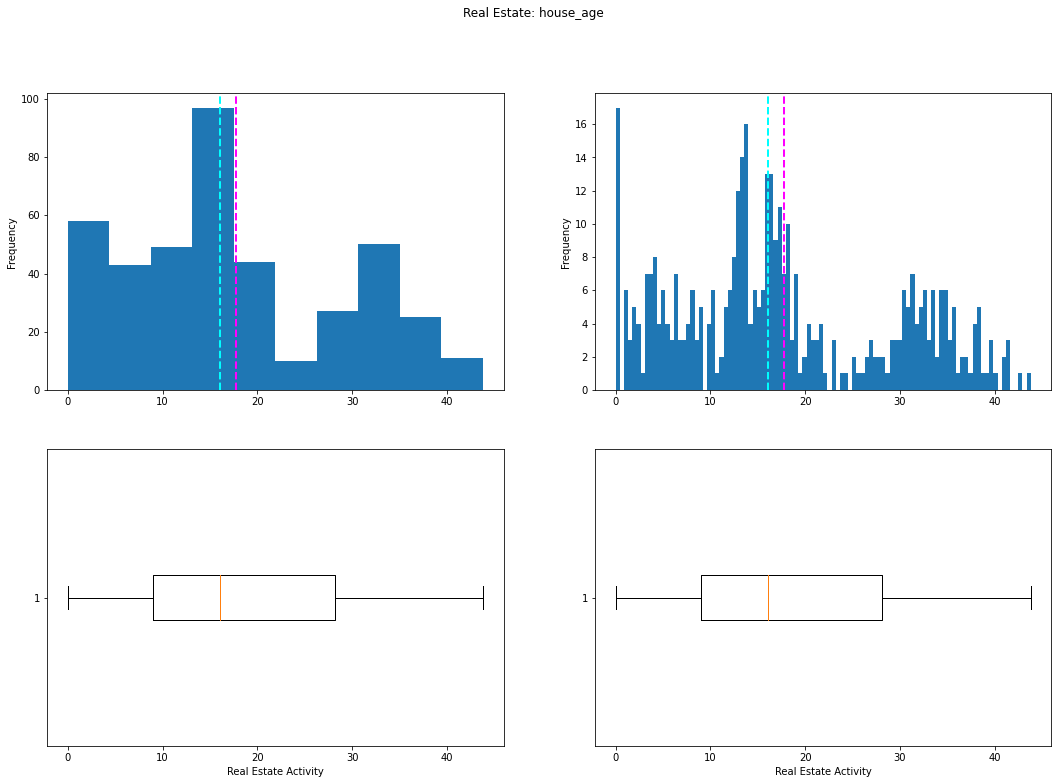

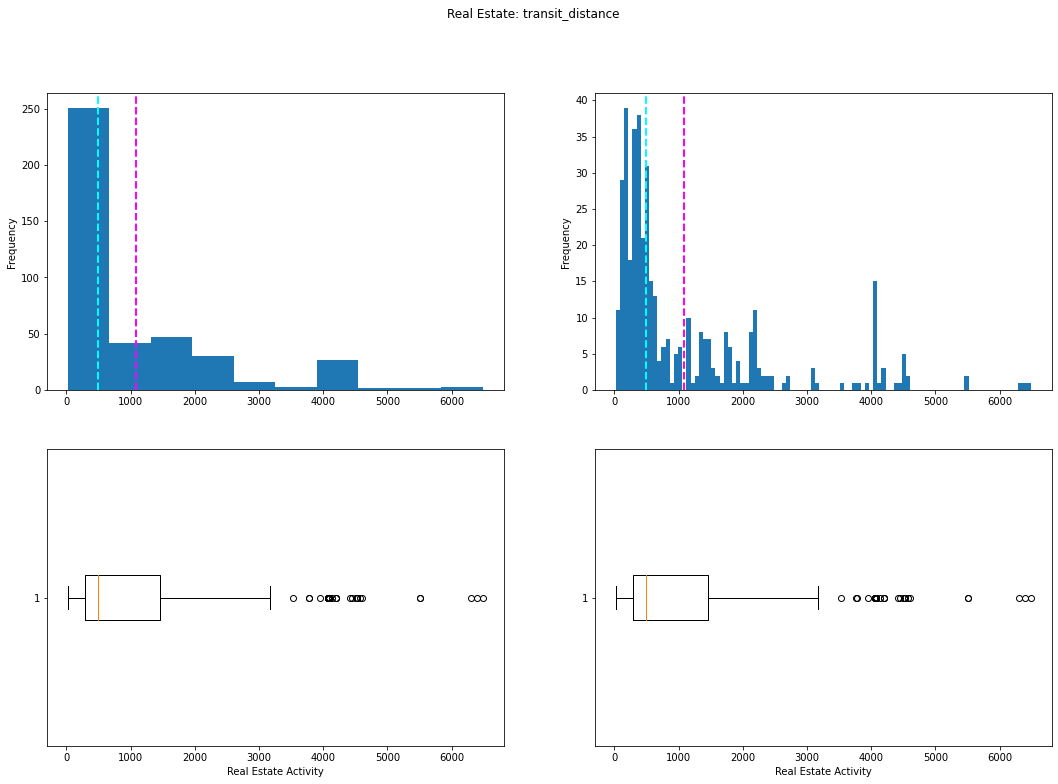

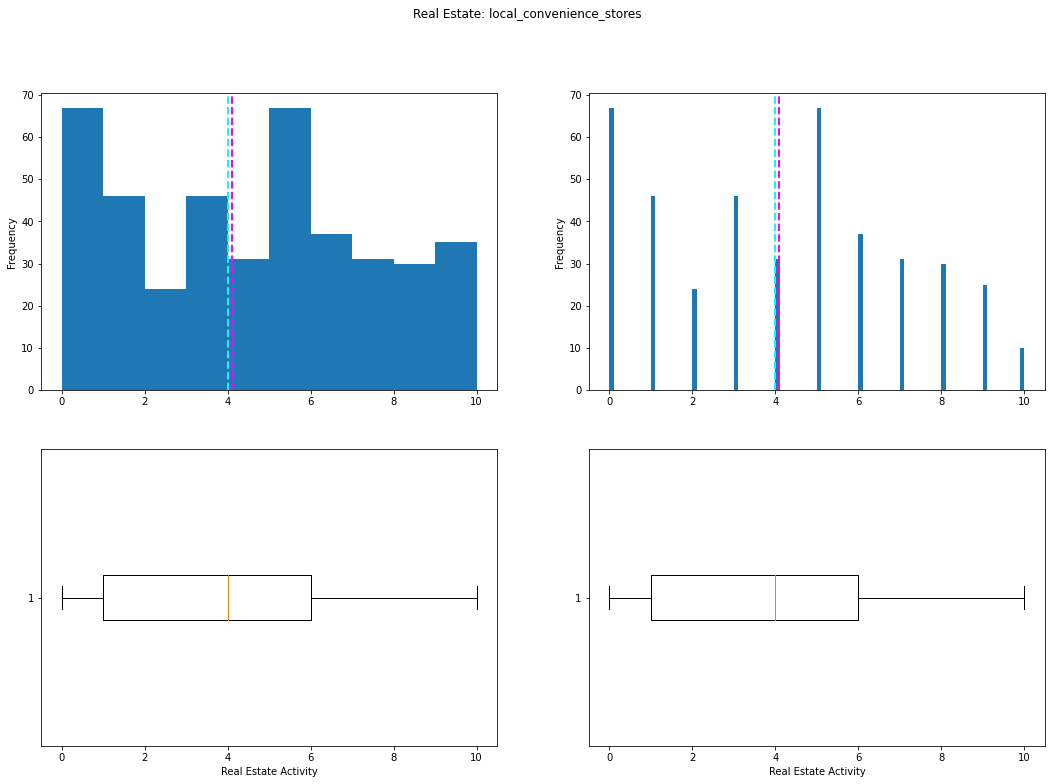

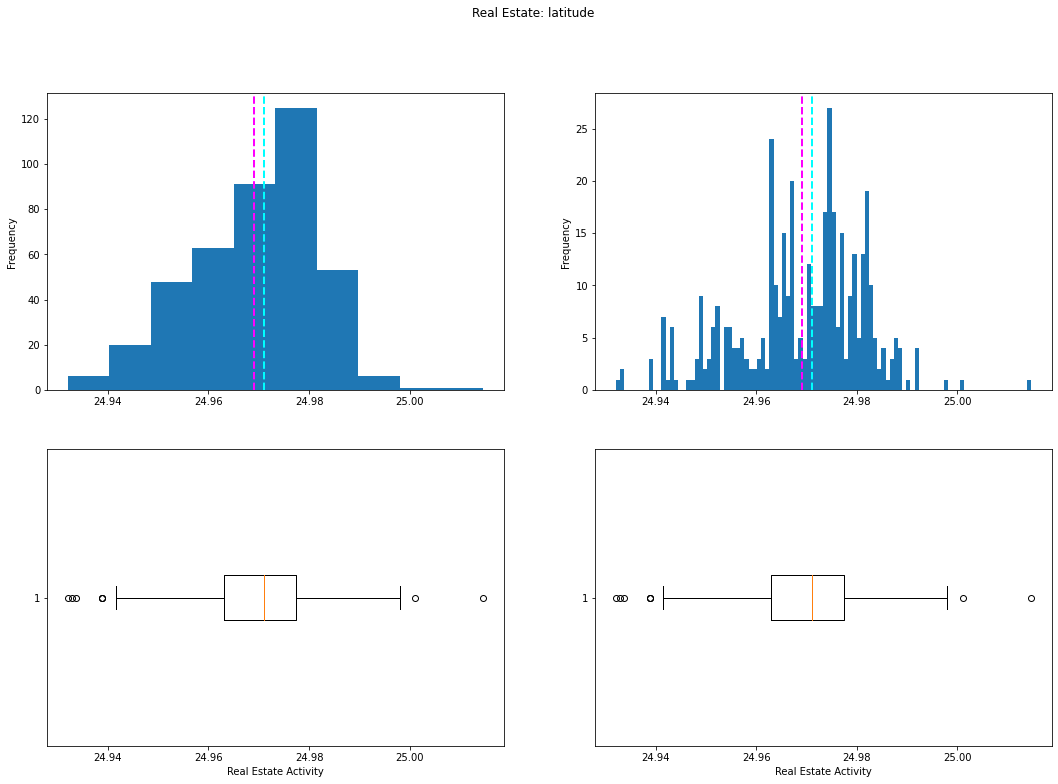

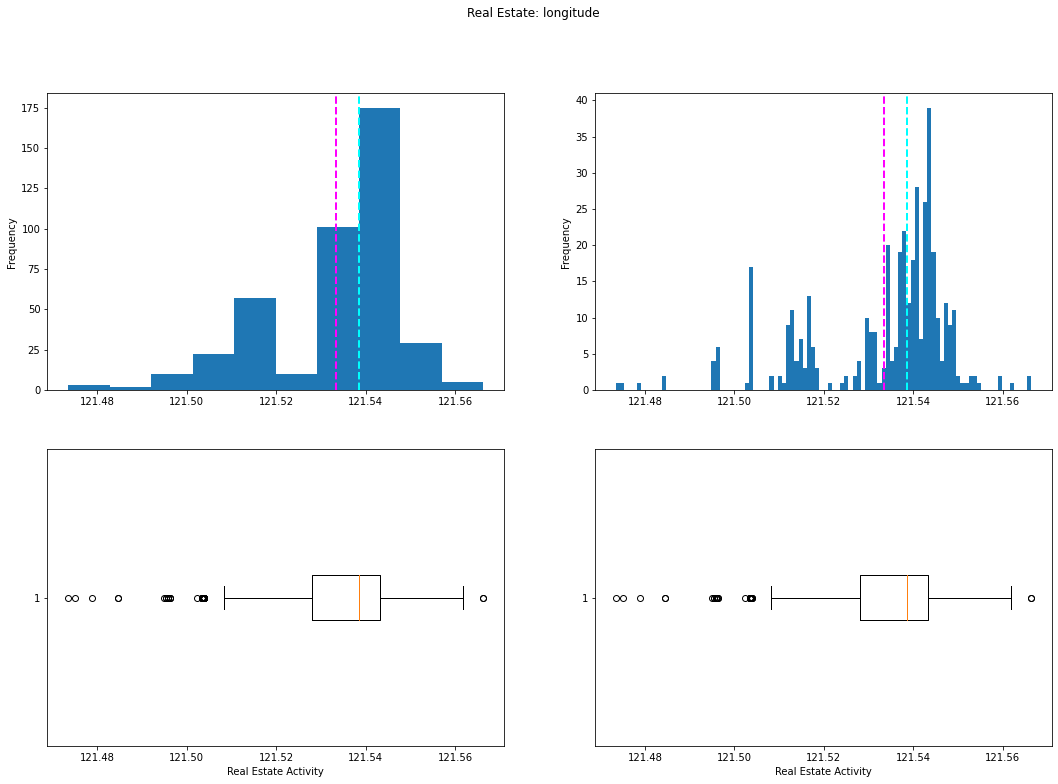

In [10]:
for feature in features:

    # create figure with 2 rows and 1 column 18 by 12
    # fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

    # plot graph in row 1 column 1
    ax[0][0].hist(df_pre[feature]) # graph type
    ax[0][0].set_ylabel('Frequency') # label vert axis
    ax[0][0].axvline(df_pre[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0][0].axvline(df_pre[feature].median(), color='cyan', linestyle='dashed', linewidth=2)

    # plot graph in row 2 column 1
    ax[1][0].boxplot(df_pre[feature], vert=False)
    ax[1][0].set_xlabel('Real Estate Activity')

    # title
    fig.suptitle(' '.join(['Real Estate:', feature]))

    # plot graph in row 1 column 2
    ax[0][1].hist(df_pre[feature], bins=100) # graph type
    ax[0][1].set_ylabel('Frequency') # label vert axis
    ax[0][1].axvline(df_pre[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0][1].axvline(df_pre[feature].median(), color='cyan', linestyle='dashed', linewidth=2)

    # plot graph in row 2 column 2
    ax[1][1].boxplot(df_pre[feature], vert=False)
    ax[1][1].set_xlabel('Real Estate Activity')

    # title
    fig.suptitle(' '.join(['Real Estate:', feature]))

# fig.tightlayout()
fig.show()


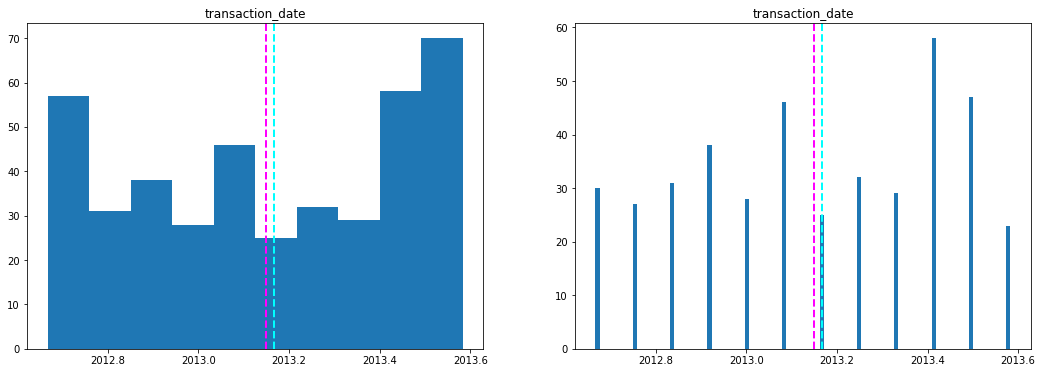

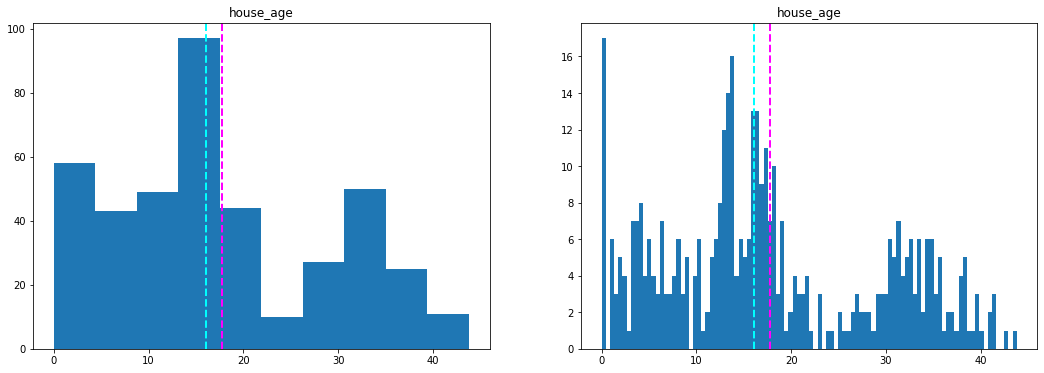

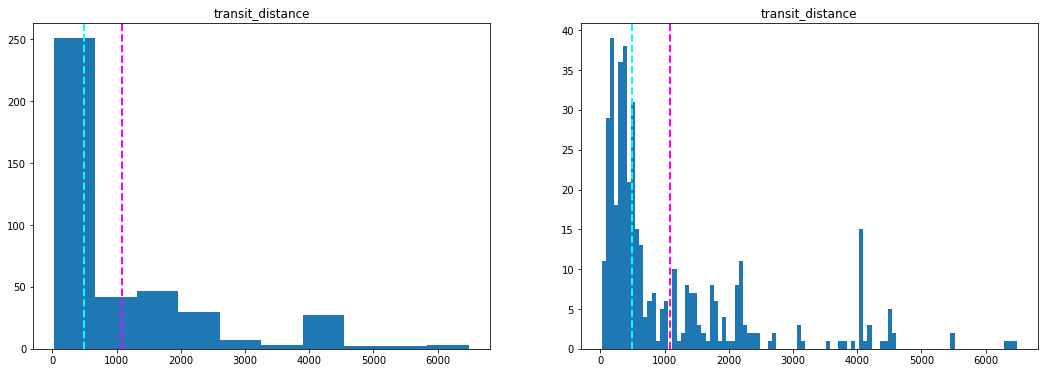

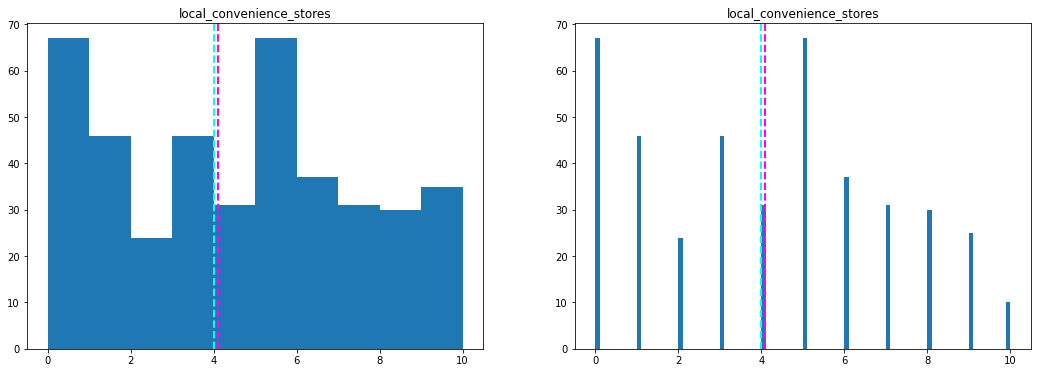

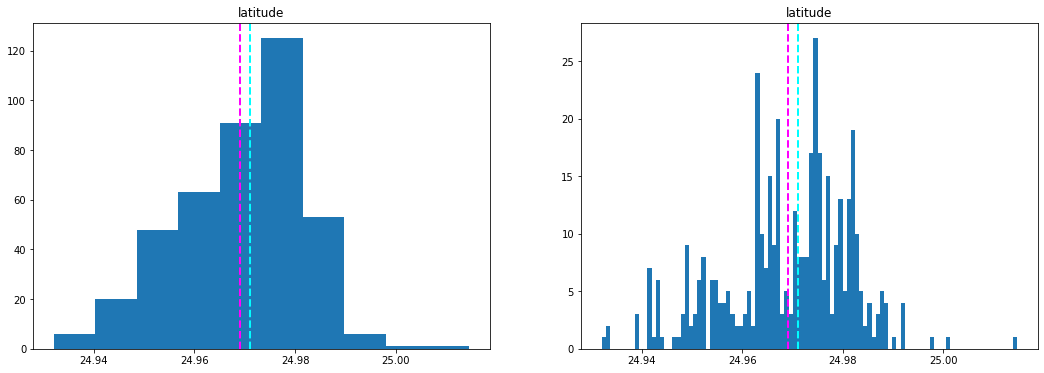

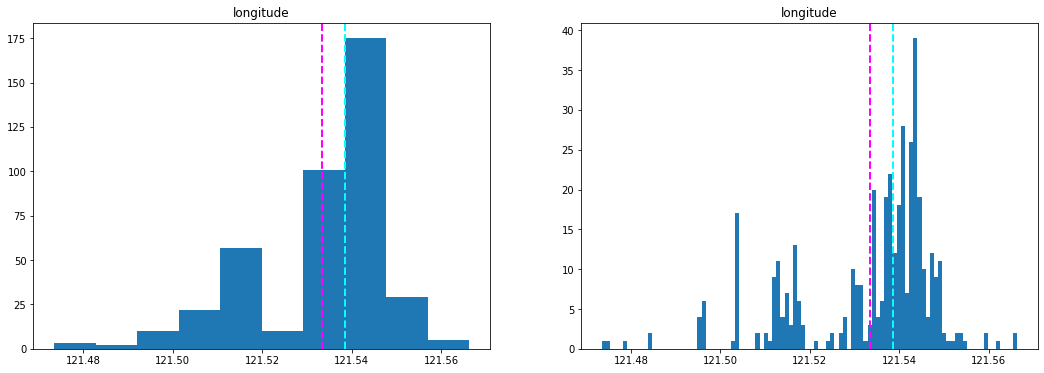

In [11]:
for feature in features:
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(18,6))
    # ax[0] = fig.gca()

    ax[0].hist(df_pre[feature])
    ax[0].axvline(df_pre[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[0].axvline(df_pre[feature].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax[0].set_title(feature)

    # ax[1] = fig.gca()
    ax[1].hist(df_pre[feature], bins=100) # ax=ax[1])
    ax[1].axvline(df_pre[feature].mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax[1].axvline(df_pre[feature].median(), color='cyan', linestyle='dashed', linewidth=2)
    ax[1].set_title(feature)

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

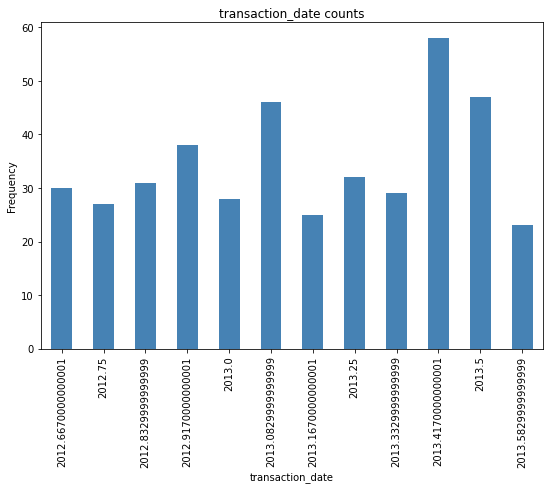

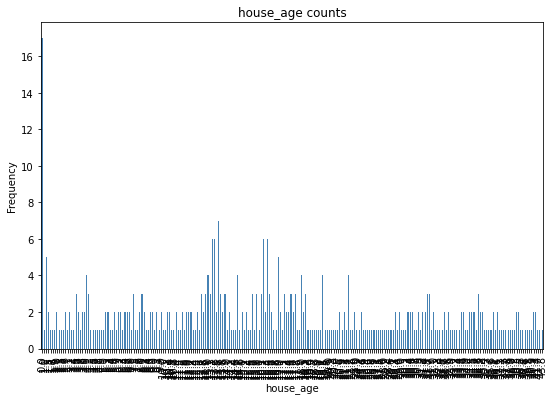

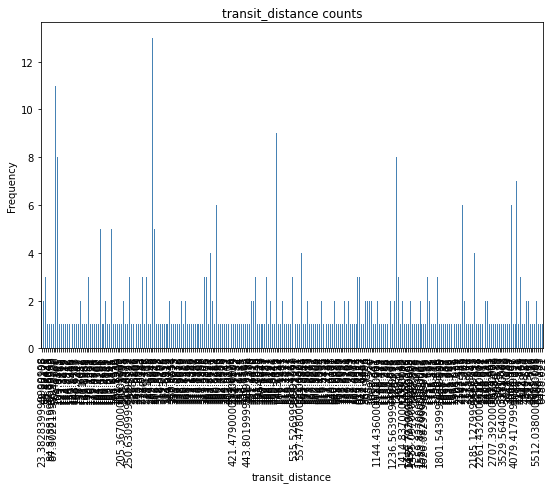

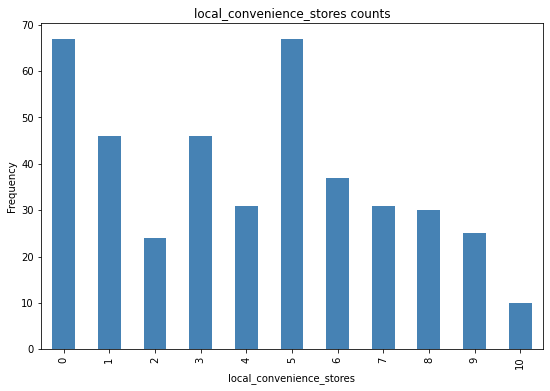

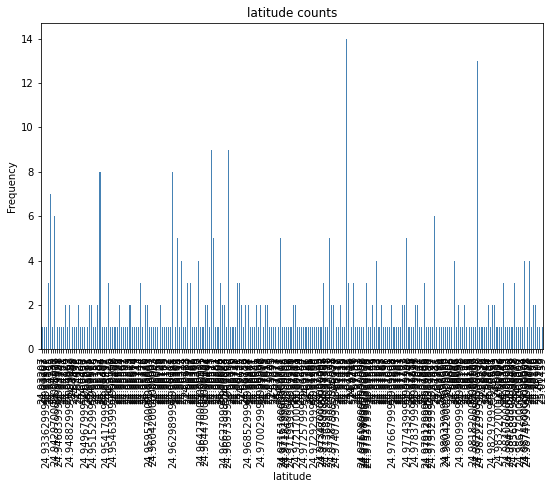

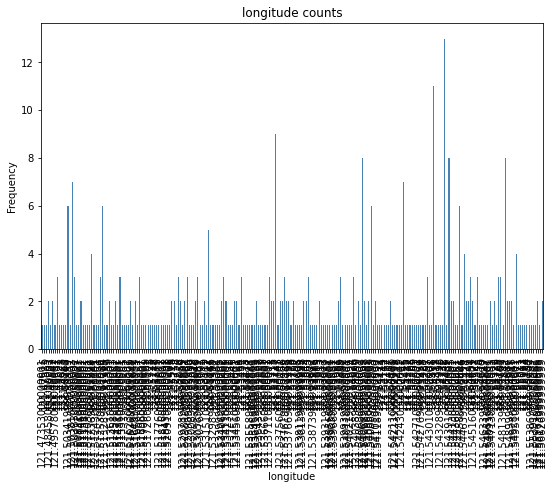

In [12]:
for feature in features:
    counts =df_pre[feature].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color='steelblue')
    ax.set_title(feature + ' counts')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.show


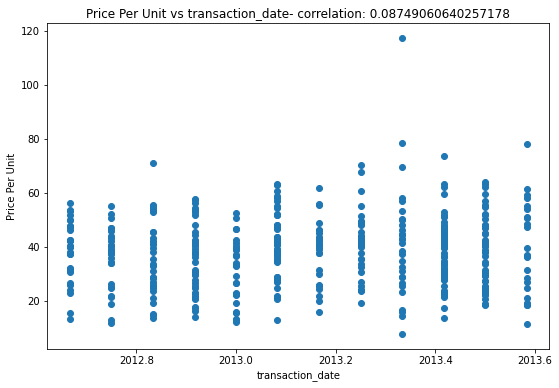

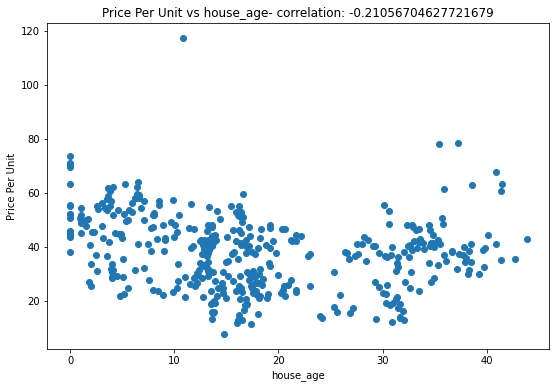

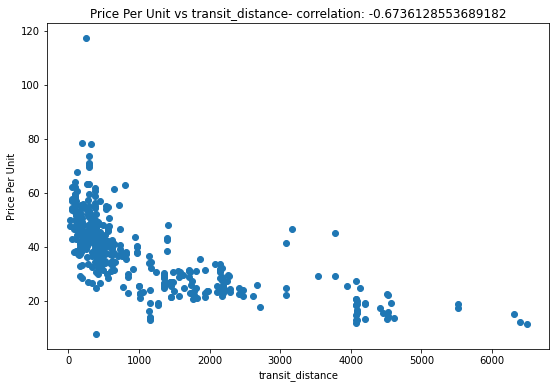

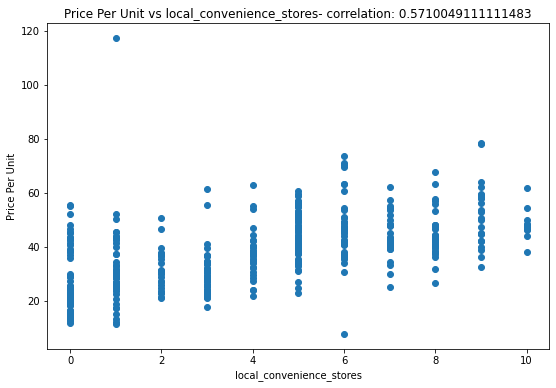

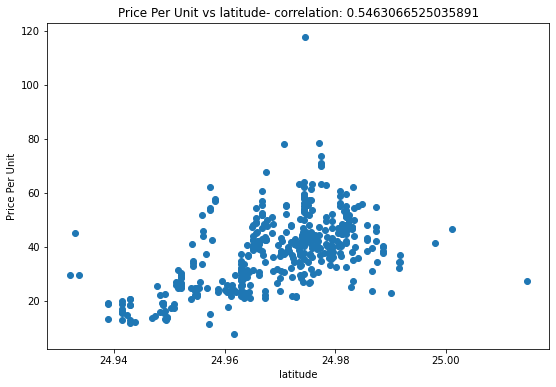

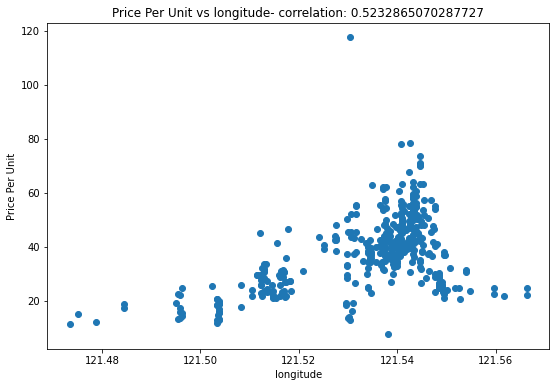

In [13]:
for col in features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df_pre[col]
    label = df_pre['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price Per Unit')
    ax.set_title('Price Per Unit vs ' + col + '- correlation: ' + str(correlation))

plt.show()


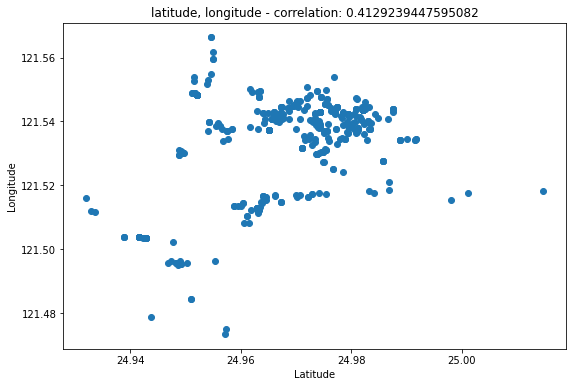

In [14]:
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
feature = df_pre['latitude']
label = df_pre['longitude']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
ax.set_title('latitude, longitude - correlation: ' + str(correlation))
plt.show()

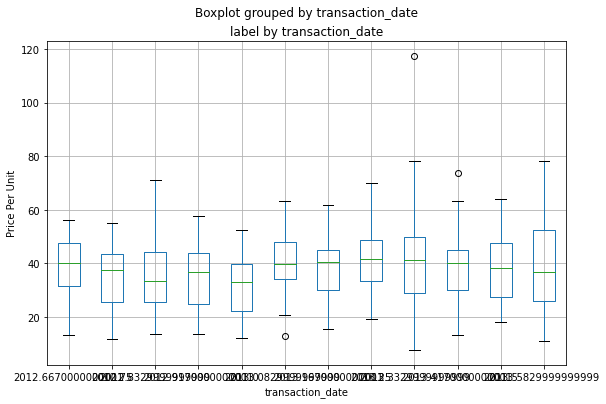

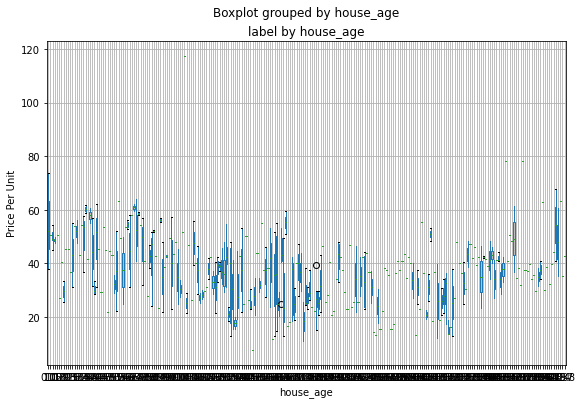

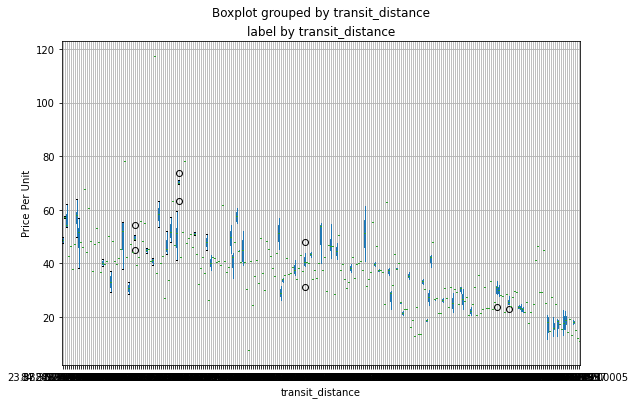

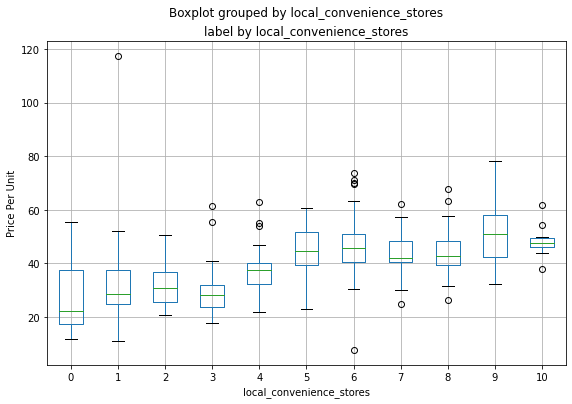

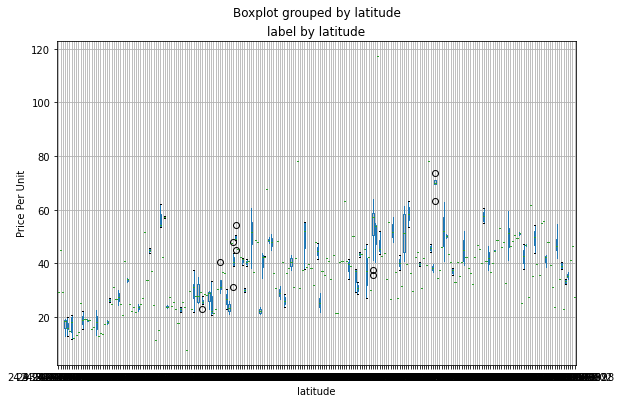

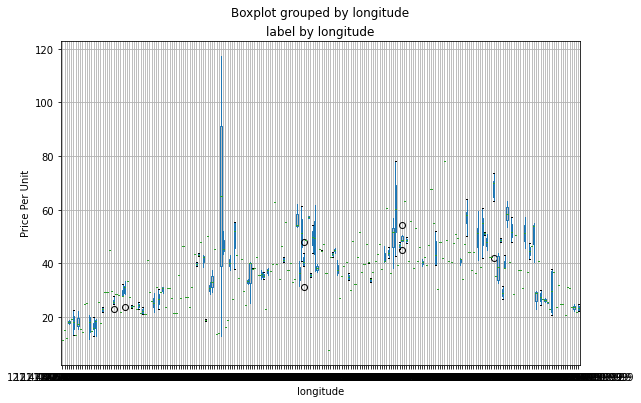

In [15]:
# plot a boxplot for the label by each categorical feature

for col in features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    df_pre.boxplot(column='price_per_unit', by=col, ax=ax)
    ax.set_title('label by ' + col)
    ax.set_ylabel('Price Per Unit')

plt.show()


In [16]:
print(len(df_pre.columns[:-1]))

6


In [17]:
# Separate features and labels
x,y = df_pre[df_pre.columns[:-1]].values, df_pre[df_pre.columns[-1]].values

print('features:', x[:10], '\nlabels:', y[:10], sep='\n')

# X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values
# print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')


features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01
  1.2151486e+02]]

labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [18]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print(f'training set: {x_train.shape[0]:d} rows \ntest set: {x_test.shape[0]:d} rows')


training set: 289 rows 
test set: 125 rows


In [20]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(x_train, y_train)
print(model)


LinearRegression()


In [21]:
predictions = model.predict(x_test)
np.set_printoptions(suppress=True)
print(f'predicted labels: {np.round(predictions)[:10]}')
print(f'actuals labels  : {y_test[:10]}')


predicted labels: [41. 13. 42. 13. 43. 40. 41. 34. 50. 46.]
actuals labels  : [45.3 14.4 46.  15.6 50.2 38.1 48.5 41.4 51.6 40.1]


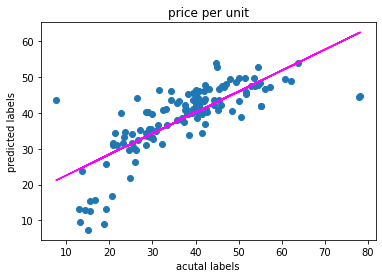

In [22]:
%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('acutal labels')
plt.ylabel('predicted labels')
plt.title('price per unit')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2}')


mse: 71.58131577255327 
rmse: 8.460574198749944 
r2: 0.5799815654577762


mse: 78.56402072588622 
rmse: 8.863634735585974 
r2: 0.5390090746378506 



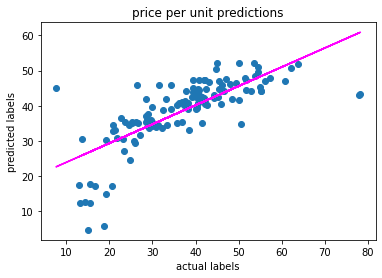

In [24]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(x_train, y_train)
(model, '\n')

# Evaluate the model using the test data
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2} \n')

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predicted labels')
plt.title('price per unit predictions')

# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(x_train, y_train)
print(model, '\n')

# Visualize the model tree
tree = export_text(model)
print(tree)


= 24.98
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_4 >  24.98
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- feature_1 >  24.25
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 2013.29
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 641.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  641.72
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_0 >  2013.29
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 4.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34.10]
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  4.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |--- feature_4 

mse: 114.59942000000001 
rmse: 10.705111863030671 
r2: 0.3275637857679198 



<function matplotlib.pyplot.show(close=None, block=None)>

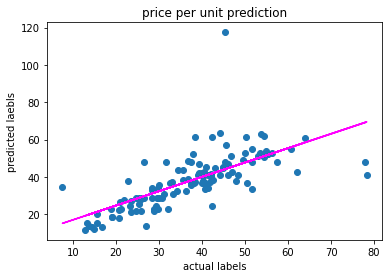

In [26]:
predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2} \n')

plt.scatter(y_test,predictions)
plt.xlabel('actual labels')
plt.ylabel('predicted laebls')
plt.title('price per unit prediction')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show

RandomForestRegressor() 

mse: 57.324773446869024 
rmse: 7.571312531316418 
r2: 0.6636348278348679 



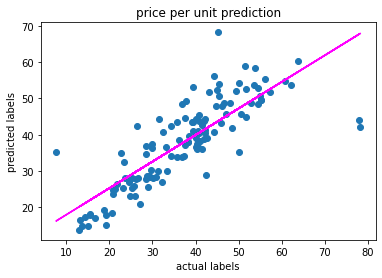

In [27]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(x_train, y_train)
print(model, '\n')

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2} \n')

plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predicted labels')
plt.title('price per unit prediction')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


GradientBoostingRegressor() 

mse: 61.69187503130234 
rmse: 7.8544175488257775 
r2: 0.6380099402341868 



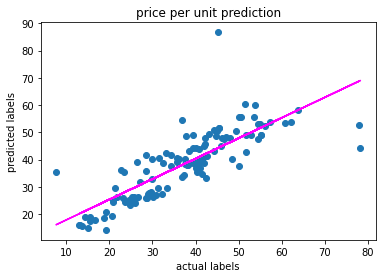

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(x_train, y_train)
print(model, "\n")

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2} \n')

plt.scatter(y_test, predictions)
plt.xlabel('actual labels')
plt.ylabel('predicted labels')
plt.title('price per unit prediction')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


best params: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

mse: 60.162948794219645 
rmse: 7.756477860099882 
r2: 0.6469812366919174 



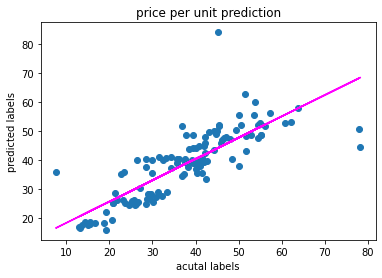

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

alg = GradientBoostingRegressor()

params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 150] 
}

score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(x_train, y_train)
print(f'best params: {gridsearch.best_params_} \n')

model = gridsearch.best_estimator_
print(model, '\n')

predictions = model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print(f'mse: {mse} \nrmse: {rmse} \nr2: {r2} \n')

plt.scatter(y_test, predictions)
plt.xlabel('acutal labels')
plt.ylabel('predicted labels')
plt.title('price per unit prediction')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


In [30]:
df_pre.head()

transaction_date  house_age  transit_distance  local_convenience_stores  \
0          2012.917       32.0          84.87882                        10   
1          2012.917       19.5         306.59470                         9   
2          2013.583       13.3         561.98450                         5   
3          2013.500       13.3         561.98450                         5   
4          2012.833        5.0         390.56840                         5   

   latitude  longitude  price_per_unit  
0  24.98298  121.54024            37.9  
1  24.98034  121.53951            42.2  
2  24.98746  121.54391            47.3  
3  24.98746  121.54391            54.8  
4  24.97937  121.54245            43.1

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

num_features = [2, 3, 4, 5]
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

cat_features = [0, 1]
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features), ('cat', cat_transformer, cat_features)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())])

model = pipeline.fit(x_train, (y_train))
print(model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2, 3, 4, 5]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('regressor', GradientBoostingRegressor())])


mse: 57.67681511214135
rmse: 7.594525338172317
r2: 0.6615691492769165


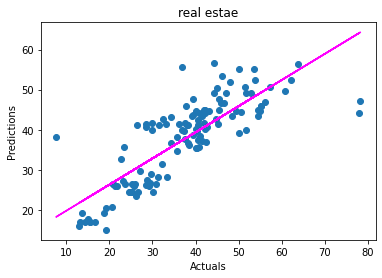

In [32]:
predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print('mse:', mse)
print('rmse:', rmse)
print('r2:', r2)

plt.scatter(y_test, predictions)
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('real estae')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [2, 3, 4, 5]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1])])),
                ('regressor', GradientBoostingRegressor())]) 

mse: 57.68100369111397
rmse: 7.5948010962179895
r2: 0.6615445719083106


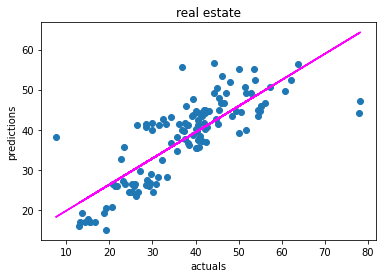

In [33]:
pipieline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

model = pipeline.fit(x_train, (y_train))
print(model, '\n')

predictions = model.predict(x_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)
print('mse:', mse)
print('rmse:', rmse)
print('r2:', r2)

plt.scatter(y_test,predictions)
plt.xlabel('actuals')
plt.ylabel('predictions')
plt.title('real estate')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()


## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [34]:
# Your code to use the trained model
import joblib

filename = './real-estate.pkl'
joblib.dump(model, filename)


['./real-estate.pkl']

In [35]:
model_load = joblib.load(filename)

x_new = np.array([
    [2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348],
    [2013.000, 13.6, 4082.015, 0, 24.94155, 121.50381]]).astype('float64')
print('new sample: {}'.format(list(x_new[0])))

result = model_load.predict(x_new)
print('prediction: {:.0f} real-estate'.format(np.round(result[0])))
for res in result:
    print(np.round(res))


new sample: [2013.167, 16.2, 289.3248, 5.0, 24.98203, 121.54348]
prediction: 49 real-estate
49.0
17.0
